In [17]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
datadir = Path("../data/")
etccdi_presentf = datadir / "Climate"/ "ISEA3H09_CCSM4_Y1950_Y2000_ETCCDI_IDW1N10.txt"
etccdi_futuref = datadir / "Climate"/ "ISEA3H09_CCSM4_Y2061_Y2080_ETCCDI_IDW1N10.txt"

# Exploring the ETCCDI climate variables

These variables were derived by aggregating ETCCDI variables of the CCSM4 grid cells into ISEA3H09. The interpolation method was  IDW that maps the 10 nearest CCSM4 grid cells to one ISEA3H09 hexagon centroid.

## Table of contents:
Exploring the entire set (only 1950-2000 as of Nov 2021):
* [1. Visualizing histograms](#1950-2000hist)
    * [1-1. Precipitation related variables, measured in days (R10MM, R1MM, R20MM, CDD, CWD)](#precp_days_group)
    * [1-2. Precipitation related variables, measured in mm (PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII)](#precp_mm_group)
    * [1-3. Temperature related variables, measured in days ( FD, ID, SU, TR, GSL, CSDI, WSDI)](#temp_days_group)
    * [1-4. Temperature related variables, measured in percentages (TN10P, TN90P, TX10P, TX90P)](#temp_pct_group)
    * [1-5. Temperature related variables, measured in degrees (TNN, TNX, TXN, TXX, DTR)](#temp_deg_group)
* [ 2. Visualizing the correlation matrix](#1950-2000corr)

Exploring the variables for planned training and test areas:
* [ 3. Visualizing histograms](#modelarea-hist)
    * [1-1. Precipitation related variables, measured in days (R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI)](#traintest_precp_days_group)
    * [1-2. Precipitation related variables, measured in mm (PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII)](#traintest_precp_mm_group)
    * [1-3. Temperature related variables, measured in days ( FD, ID, SU, TR, GSL)](#traintest_temp_days_group)
    * [1-4. Temperature related variables, measured in percentages (TN10P, TN90P, TX10P, TX90P)](#traintest_temp_pct_group)
    * [1-5. Temperature related variables, measured in degrees (TNN, TNX, TXN, TXX, DTR)](#traintest_temp_deg_group)
* [ 4. Visualizing the correlation matrix](#model-corr)

## I. Exploring the entire dataset

In [3]:
# reading the present-day data
present = pd.read_csv(etccdi_presentf, sep="\t")
present.sample(5)

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
134070,134071,17.158349,5.239192,8.493674,7.219116,364.917023,0.000000,360.325779,504.686868,3.948582,152.747686,0.104418,83.779249,23.549050,15.180374,29.754583,3.302085,0.000000,10.256364,11.113835,-40.862104,-1.005883,0.000000,10.329130,11.202141,-37.258552,0.386473,3.896285
137003,137004,117.408136,10.642218,3.593183,5.662238,365.000000,0.000000,364.936378,39.797683,0.041091,19.514017,0.000000,5.942672,1.649626,4.775463,11.005682,1.961059,0.000000,10.373850,10.967002,-55.442058,-4.887191,0.000000,10.416283,11.099387,-52.296174,-2.488965,6.258464
191988,191989,20.424426,7.871631,9.823390,0.840712,0.000000,365.000000,0.000000,1081.908874,31.298370,140.263200,13.135920,291.160263,93.547856,67.926669,115.606547,7.695800,1.010171,11.428329,10.329339,12.625259,23.758314,119.988599,11.206255,10.327277,13.556115,24.501744,5.543556
187176,187177,20.668740,8.061001,16.586877,0.683153,0.000000,365.000000,0.000000,1126.153381,30.781046,176.263609,11.269549,313.556196,109.812826,57.329503,127.263643,6.306996,290.944895,10.928784,10.520715,22.204114,27.378321,364.979991,10.908529,10.645600,23.111529,27.975453,10.873904
21299,21300,15.466580,4.485569,12.996003,3.675936,11.980834,338.886027,0.124855,869.649613,16.997253,188.348719,1.944422,167.785656,50.627398,27.736279,53.473589,4.600819,0.842568,10.349022,10.751529,-0.583252,17.934890,0.057786,10.287298,11.097328,2.253594,22.448225,4.594920


In [4]:
# reading the future data
future = pd.read_csv(etccdi_futuref, sep="\t")
future.sample(5)

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
31355,31356,10.826145,0.0,55.668970,8.300467,0.000000,365.0,0.000000,2279.837302,77.177846,294.372962,16.454853,526.871302,191.693497,51.687150,108.088699,7.713228,364.961770,0.284969,95.864309,18.801748,26.830290,362.539379,0.297463,84.939533,26.722650,40.496434,259.559855
103421,103422,141.520939,0.0,24.355445,0.726161,0.000000,365.0,0.000000,731.957976,19.435821,118.533682,5.006390,132.871717,43.241447,37.852063,93.222959,5.906314,365.000000,0.000810,97.348665,26.096849,30.368279,365.000000,0.000000,96.924329,26.956014,31.010914,350.922761
44509,44510,155.100955,0.0,15.772710,12.568439,0.000000,365.0,0.000000,627.588456,13.809276,116.520673,3.387043,182.225112,67.812514,46.850281,89.408421,5.363515,364.836177,0.063466,79.749255,13.608846,32.133329,275.084769,1.552017,47.127786,26.856697,46.329334,109.851965
193279,193280,14.770416,0.0,8.918505,1.128356,0.000000,365.0,0.000000,1094.932770,33.699726,145.466499,11.779749,338.112625,112.519905,60.318876,98.254104,7.518076,2.060152,0.047831,76.582844,11.083718,24.032198,104.064150,0.043710,79.022130,12.373989,24.852050,239.901353
688,689,26.258175,0.0,6.984949,3.082757,359.529774,0.0,331.055718,241.083599,1.206065,98.101868,0.014427,51.405989,24.772461,11.574587,22.772576,2.448162,0.000000,0.041096,66.888474,-37.042868,0.253666,0.000000,0.152852,52.711969,-34.672524,1.348481,131.033107


In [5]:
# basic statistics for present, something weird about CDD's max value
present.describe(include="all")

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
count,196832.00000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000
mean,98416.50000,53.461916,5.921488,19.448150,3.913968,66.152896,283.407494,49.761787,1027.460573,28.711493,154.435523,8.879405,236.388862,75.945661,43.664978,92.993421,5.987150,134.004543,10.170603,11.166394,1.226858,20.310472,159.527339,10.198060,11.146702,4.758275,24.631820,8.267821
std,56820.64843,120.135759,3.414841,16.634862,3.965489,119.556650,136.089634,105.124877,740.698730,26.403323,74.932983,10.030891,174.392344,57.529881,24.547932,59.347809,2.390525,145.094095,0.658983,0.724655,23.936553,10.356050,156.289682,0.653036,0.753927,22.663115,11.696714,5.638105
min,1.00000,4.009007,0.067093,0.042284,0.407698,0.000000,0.000000,0.000000,0.055981,0.000000,0.042284,0.000000,0.000000,0.000000,0.669288,1.662915,0.053741,0.000000,7.797225,8.633949,-74.617955,-30.565328,0.000000,8.091539,8.599853,-72.497892,-25.841064,0.022317
25%,49208.75000,13.973389,3.384982,8.654831,0.669764,0.000000,223.528982,0.000000,487.364333,8.249519,104.463420,1.042032,106.375416,33.203361,23.241466,45.351262,4.036451,0.000000,9.750012,10.688299,-9.019107,16.460489,0.014944,9.801452,10.638720,-4.050492,20.446503,4.176016
50%,98416.50000,23.761283,5.672391,13.472844,1.979585,0.000000,365.000000,0.000000,951.884730,22.361179,155.981161,5.309775,204.332062,63.245950,40.070109,78.636339,5.765742,66.131205,10.141659,11.115011,9.166234,24.193069,113.964472,10.168131,11.054468,13.112167,27.765465,7.481039
75%,147624.25000,53.208218,7.945608,25.749495,6.539862,72.862497,365.000000,12.526608,1349.030337,40.499057,208.386895,13.536889,323.305303,104.938461,61.973293,130.848140,7.720937,289.566001,10.540513,11.598794,20.429288,27.705534,361.674213,10.574305,11.588533,22.460634,30.087498,11.377216
max,196832.00000,11719.647151,22.658614,192.748037,15.882537,365.000000,365.000000,365.000000,6041.701696,197.288133,340.268278,108.359245,1299.631735,399.696169,177.918199,486.991962,22.302361,365.000000,13.330696,15.019223,26.222249,36.102259,365.000000,13.138606,14.961791,27.597581,51.419834,34.264405


In [6]:
# basic statistics for future, not as bad as present but still something wrong with CDD
future.describe(include="all")

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
count,196832.00000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000
mean,98416.50000,55.349608,0.062104,19.181231,3.759949,52.457784,298.530231,38.761586,1083.466199,30.352154,152.323867,10.021375,306.207965,123.454344,52.059361,106.191104,6.419588,171.010609,0.328841,73.390967,5.167704,23.172875,188.662922,0.561951,70.549477,8.491496,27.659636,211.807220
std,56820.64843,95.986691,0.261024,16.075578,3.946831,106.397361,124.618439,92.436075,786.312300,26.929348,74.611208,10.786923,233.723076,103.680316,31.909777,71.771131,2.643530,154.763458,0.588765,22.374679,22.066855,10.284860,157.211886,0.821961,23.296757,20.798859,12.096030,112.966388
min,1.00000,4.035633,0.000000,0.216559,0.407343,0.000000,0.000000,0.000000,0.561887,0.000000,0.254889,0.000000,0.000000,0.000000,1.003244,2.237605,0.429588,0.000000,0.000000,17.337951,-70.128028,-25.852768,0.000000,0.000000,17.234324,-67.829120,-21.136453,12.760962
25%,49208.75000,14.506462,0.000000,8.697210,0.662019,0.000000,313.479169,0.000000,511.198894,9.586854,106.508720,1.537817,131.279890,48.163502,26.204182,49.758943,4.323362,0.092846,0.001262,56.869318,-3.828242,19.858547,2.072170,0.001024,50.453852,-0.016607,23.155063,109.297674
50%,98416.50000,24.133261,0.000000,13.332083,1.829274,0.000000,365.000000,0.000000,1001.451185,24.598328,152.880039,6.471611,273.363108,102.074447,46.251365,87.079877,6.205303,139.147799,0.058466,77.114324,12.166149,27.010326,194.434719,0.133520,72.725667,15.721090,30.118626,202.122275
75%,147624.25000,58.839736,0.000000,25.411271,6.049094,22.444292,365.000000,1.578715,1414.780127,41.897886,203.506910,15.434898,422.783601,169.299344,73.488454,151.305818,8.247411,359.840375,0.425197,95.410452,22.669547,30.261449,364.992063,0.934095,94.587555,24.754798,33.253611,337.614141
max,196832.00000,2465.462515,6.297163,181.446663,15.749656,365.000000,365.000000,365.000000,7017.731341,202.590985,338.518859,124.809496,2245.722182,1104.196014,211.404602,602.619361,23.735800,365.000000,8.424462,99.990840,28.537533,40.671134,365.000000,8.483054,99.998351,30.957332,55.756954,364.993982


In [7]:
# check for missing data for present - seems to be none
present.isnull().values.any()

False

In [8]:
# check for missing data for future - seems to be none
present.isnull().values.any()

False

### 1. Visualizing histograms <a class="anchor" id="1950-2000hist"></a>

In [9]:
# Roughly splitting the indices into groups by what they are measuring and the units of measurement

# precipitation related, measured in days: R10MM, R1MM, R20MM, CDD, CWD
precp_days_group = ["R10MM_IDW1N10", "R1MM_IDW1N10", "R20MM_IDW1N10", "CDD_IDW1N10", 
                    "CWD_IDW1N10"]

# precipitation related, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII
precp_mm_group = ["PRCPTOT_IDW1N10","R95P_IDW1N10","R99P_IDW1N10", "RX1DAY_IDW1N10",
                  "RX5DAY_IDW1N10", "SDII_IDW1N10"]

# temperature related, measured in days: FD, ID, SU, TR, GSL, CSDI, WSDI
temp_days_group = ["FD_IDW1N10", "ID_IDW1N10", "SU_IDW1N10", "TR_IDW1N10", "GSL_IDW1N10", "CSDI_IDW1N10", "WSDI_IDW1N10"]

# temperature related, measured in percentages: TN10P, TN90P, TX10P, TX90P
temp_pct_group = ["TN10P_IDW1N10", "TN90P_IDW1N10", "TX10P_IDW1N10", "TX90P_IDW1N10"]

# temperature related, measured in degrees: TNN, TNX, TXN, TXX, DTR
temp_deg_group = ["TNN_IDW1N10", "TNX_IDW1N10", "TXN_IDW1N10", "TXX_IDW1N10", "DTR_IDW1N10"]

# dictionary of what the bioclimatic variables are
var_dict={"R10MM_IDW1N10": "Annual count of days when prcp>=10mm", "R1MM_IDW1N10":"Annual count of days when prcp>=1mm", 
          "R20MM_IDW1N10":"Annual count of days when prcp>=20mm", "CDD_IDW1N10":"Max length of dry spell", 
          "CWD_IDW1N10":"Max length of wet spell", "CSDI_IDW1N10":"Cold spell duration index", 
          "WSDI_IDW1N10":"Warm spell duration index", "PRCPTOT_IDW1N10":"Annual total prcp in wet days", 
          "R95P_IDW1N10":"Annual total prcp when daily prcp > 95th pct", "R99P_IDW1N10":"Annual total prcp when daily prcp > 99th pct", 
          "RX1DAY_IDW1N10":"Monthly max 1-day precipitation","RX5DAY_IDW1N10":"Monthly max 5-day precipitation", 
          "SDII_IDW1N10":"Mean of daily prcp", "FD_IDW1N10":"Number of frost days", 
          "ID_IDW1N10":"Number of icing days","SU_IDW1N10":"Number of summer days", 
          "TR_IDW1N10":"Number of tropical nights", "GSL_IDW1N10":"Growing season length", 
          "TN10P_IDW1N10":"Pct of days when daily min temp < 10th pct", "TN90P_IDW1N10":"Pct of days when daily min temp > 90th pct", 
          "TX10P_IDW1N10":"Pct of days when daily max temp < 10th pct", "TX90P_IDW1N10":"Pct of days when daily max temp > 90th pct", 
          "TNN_IDW1N10":"Monthly min of daily min temp", "TNX_IDW1N10":"Monthly max of daily min temp", 
          "TXN_IDW1N10":"Monthly min of daily max temp", "TXX_IDW1N10":"Monthly max of daily max temp", 
          "DTR_IDW1N10":"Daily temperature range"}

#### 1-1. Precipitation related variables, measured in days: R10MM, R1MM, R20MM, CDD, CWD <a class="anchor" id="precp_days_group"></a>

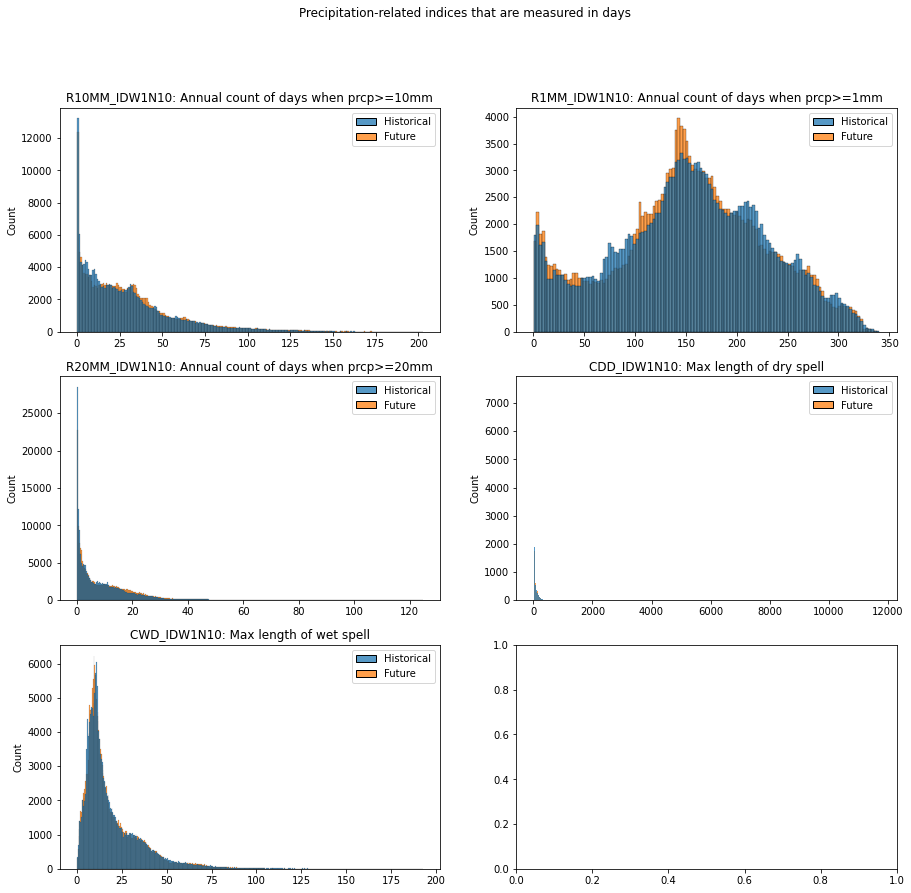

In [10]:
# definitely something off about CDD, will export to CSV to visualize in QGIS
fig, axes = plt.subplots(3, 2, figsize=(15, 14),sharey=False)
#plt.ylim((0,8500))
fig.suptitle('Precipitation-related indices that are measured in days')
    
for idx,ax in zip(precp_days_group, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

In [11]:
# number of outlier hexagons in present and future
outliers_present = set(present[present["CDD_IDW1N10"]>365].HID.unique())
outliers_future = set(future[future["CDD_IDW1N10"]>365].HID.unique())

print("CDD outliers 1950-2000:", len(outliers_present))
print("CDD outliers 2061-2080:", len(outliers_future))
print("Outliers in both present and future:",len(outliers_present & outliers_future))
print("Total number of outliers (present and future):",len(outliers_present | outliers_future))

CDD outliers 1950-2000: 1903
CDD outliers 2061-2080: 1779
Outliers in both present and future: 1406
Total number of outliers (present and future): 2276


In [12]:
# create a single dataframe for the present and future outliers
# first get the outlier rows separately for each dataframe
CDD_outliersp = present[present["HID"].isin(outliers_present | outliers_future)]
CDD_outliersf = future[future["HID"].isin(outliers_present | outliers_future)]

# drop everything but HID and CDD
CDD_outliersp.drop(CDD_outliersp.columns.difference(['HID',"CDD_IDW1N10"]), 1,inplace=True)
CDD_outliersf.drop(CDD_outliersf.columns.difference(['HID',"CDD_IDW1N10"]), 1,inplace=True)

# rename columns so I know which onees are historical and which are not
CDD_outliersp.rename(columns={"CDD_IDW1N10": "CDD_present"}, inplace=True)
CDD_outliersf.rename(columns={"CDD_IDW1N10": "CDD_future"}, inplace=True)

#combine the two dataframes into one
CDD_outliers = CDD_outliersp.merge(CDD_outliersf, on="HID")

/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
# setting indicator column
# p: outlier in present only, f: outlier in future only, pf: outlier in present and future
conditions = [
    (CDD_outliers['CDD_present'] > 365) & (CDD_outliers['CDD_future'] <= 365),
    (CDD_outliers['CDD_present'] <= 365) & (CDD_outliers['CDD_future'] > 365),
    (CDD_outliers['CDD_present'] > 365) & (CDD_outliers['CDD_future'] > 365)]
cases = ["p", "f", "pf"]

CDD_outliers['outlier_marker'] = np.select(conditions, cases)

CDD_outliers.to_csv("cdd_outliers.csv", index=False)

In [22]:
CDD_outliers

,HID,CDD_present,CDD_future,outlier_marker
0,31165,256.902430,389.850306,f
1,33779,385.091032,421.076029,pf
2,33860,368.278155,408.247745,pf
3,33941,461.794300,556.407347,pf
4,34022,533.456267,684.869938,pf
...,...,...,...,...
2271,151409,381.068374,234.043324,p
2272,151487,372.964939,211.647097,p
2273,151488,402.618860,208.120858,p
2274,151489,387.379018,222.645114,p


In [11]:
#CDD_outliers.to_csv("cdd_outliers.csv", index=False)

/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-11-8e08ea8dffa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDD_outliers["value_over365"] = 1


**QGIS Visualization results:**

Still need to confirm that the period for all variables was "year", but at least for the CDD outliers, I can ignore them because they are not areas of interest in my training or test data.

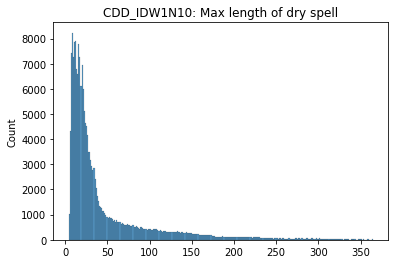

In [12]:
# re-visualizing CDD without outliers
sns.histplot(data=present[present["CDD_IDW1N10"]<=365].CDD_IDW1N10)
plt.xlabel(None)
plt.title("CDD_IDW1N10"+": "+var_dict["CDD_IDW1N10"])
plt.show()

#### 1-2. Precipitation related variables, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII <a class="anchor" id="precp_mm_group"></a>

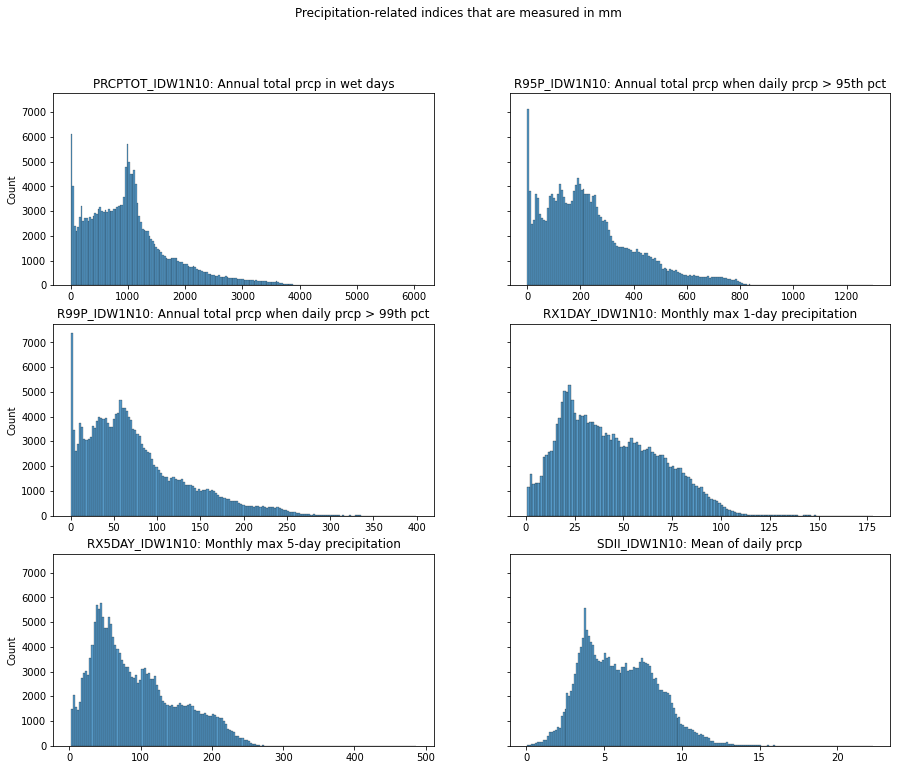

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=True)
fig.suptitle('Precipitation-related indices that are measured in mm')

for idx,ax in zip(precp_mm_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-3. Temperature related variables, measured in days: FD, ID, SU, TR, GSL, CSDI, WSDI<a class="anchor" id="temp_days_group"></a>

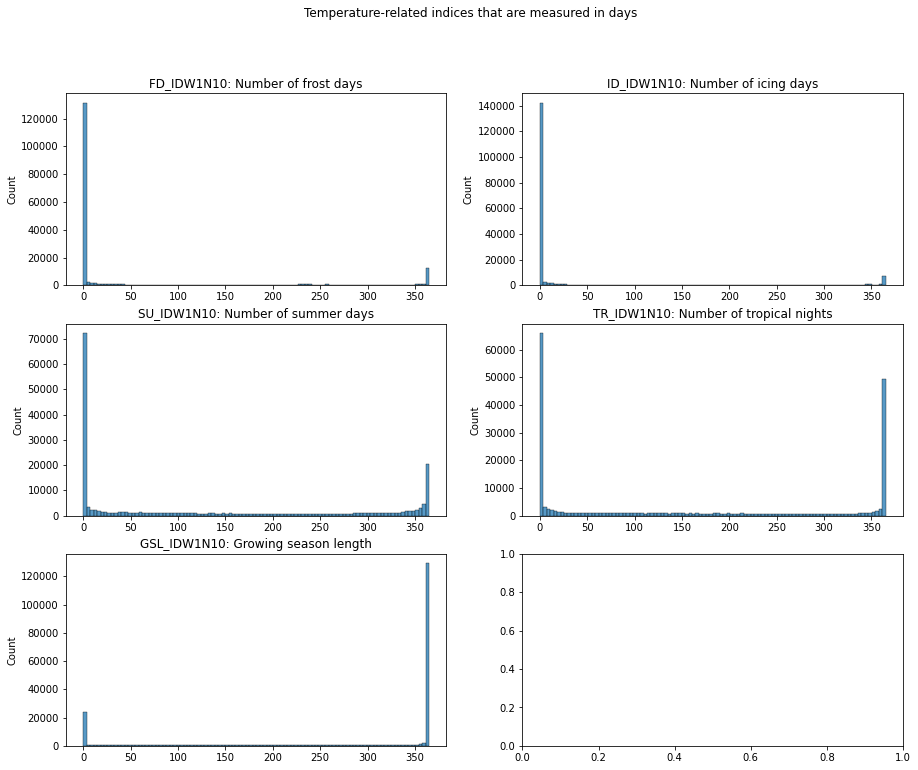

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in days')

for idx,ax in zip(temp_days_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx],bins=100)
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-4. Temperature related variables, measured in percentages: TN10P, TN90P, TX10P, TX90P<a class="anchor" id="temp_pct_group"></a>

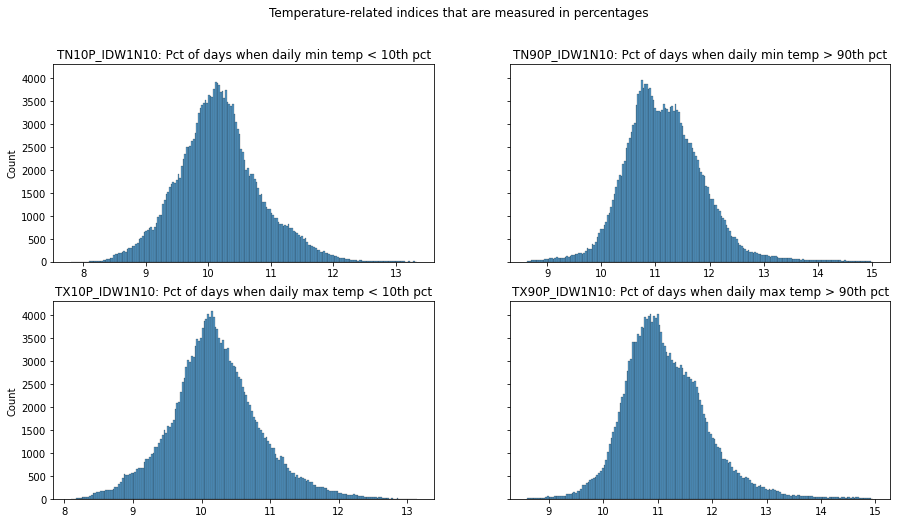

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8),sharey=True)
fig.suptitle('Temperature-related indices that are measured in percentages')

for idx,ax in zip(temp_pct_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-5. Temperature related variables, measured in degrees: TNN, TNX, TXN, TXX, DTR<a class="anchor" id="temp_deg_group"></a>

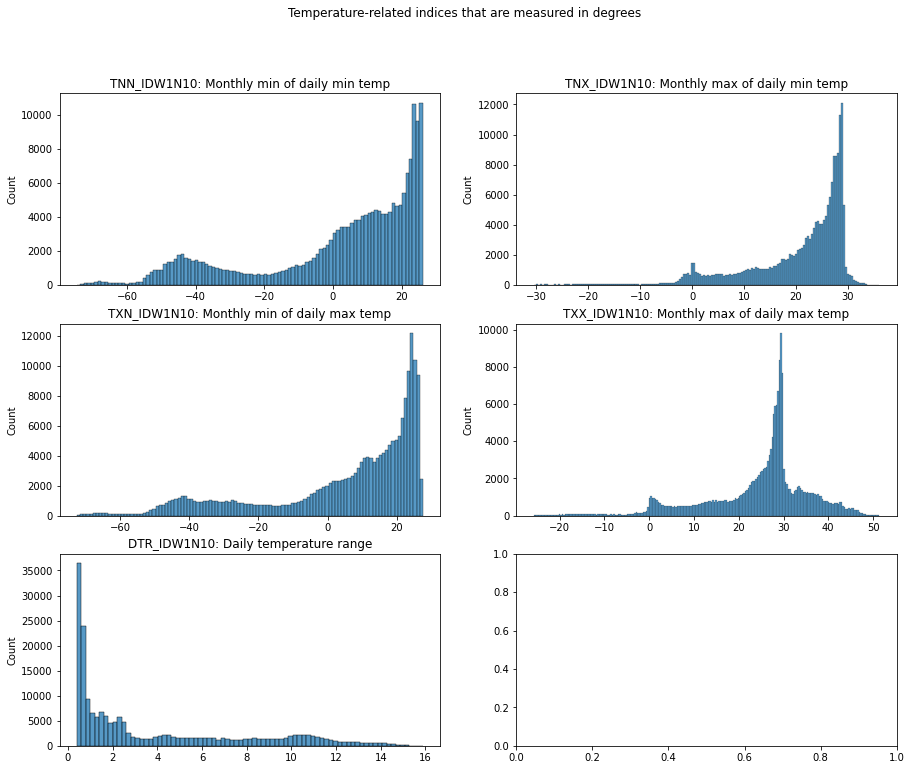

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in degrees')

for idx,ax in zip(temp_deg_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

### 2. Visualizing the correlation matrix<a class="anchor" id="1950-2000corr"></a>

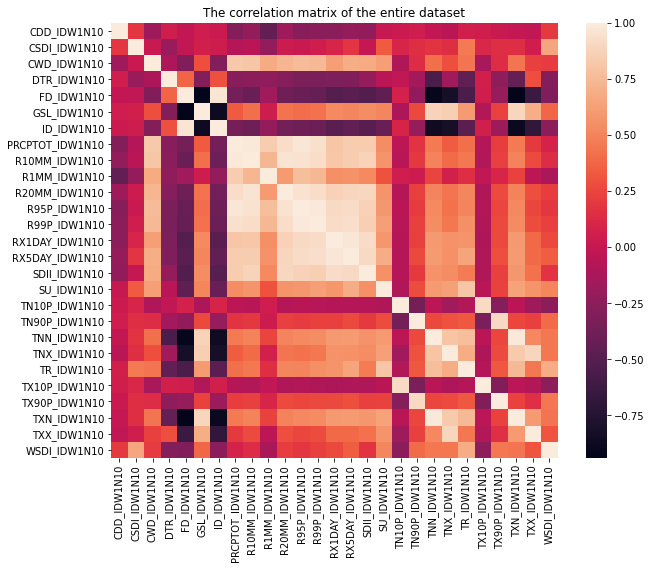

In [17]:
plt.figure(figsize=(10,8))
plt.title("The correlation matrix of the entire dataset")

corr = present.drop("HID", axis=1,inplace=False).corr()
sns.heatmap(corr)
plt.show()

## II. Exploring the variables for planned training and test areas
The test area is every landmass on Earth.

In [18]:
elephasf = datadir / "Elephas_Maximus"

# reading the data
trainhex = pd.read_csv(elephasf/"Elephas_Maximus_PA_Natural_O20.txt", sep="\t")
testhex = pd.read_csv(elephasf/"Elephas_Maximus_Predictions_GLM_Y1950_Y2000.txt", sep="\t")

In [19]:
traindata = present[present["HID"].isin(list(trainhex.HID))]

### 1. Visualizing histograms <a class="anchor" id="modelarea-hist"></a>

#### 1-1. Precipitation related variables, measured in days: R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI <a class="anchor" id="traintest_precp_days_group"></a>

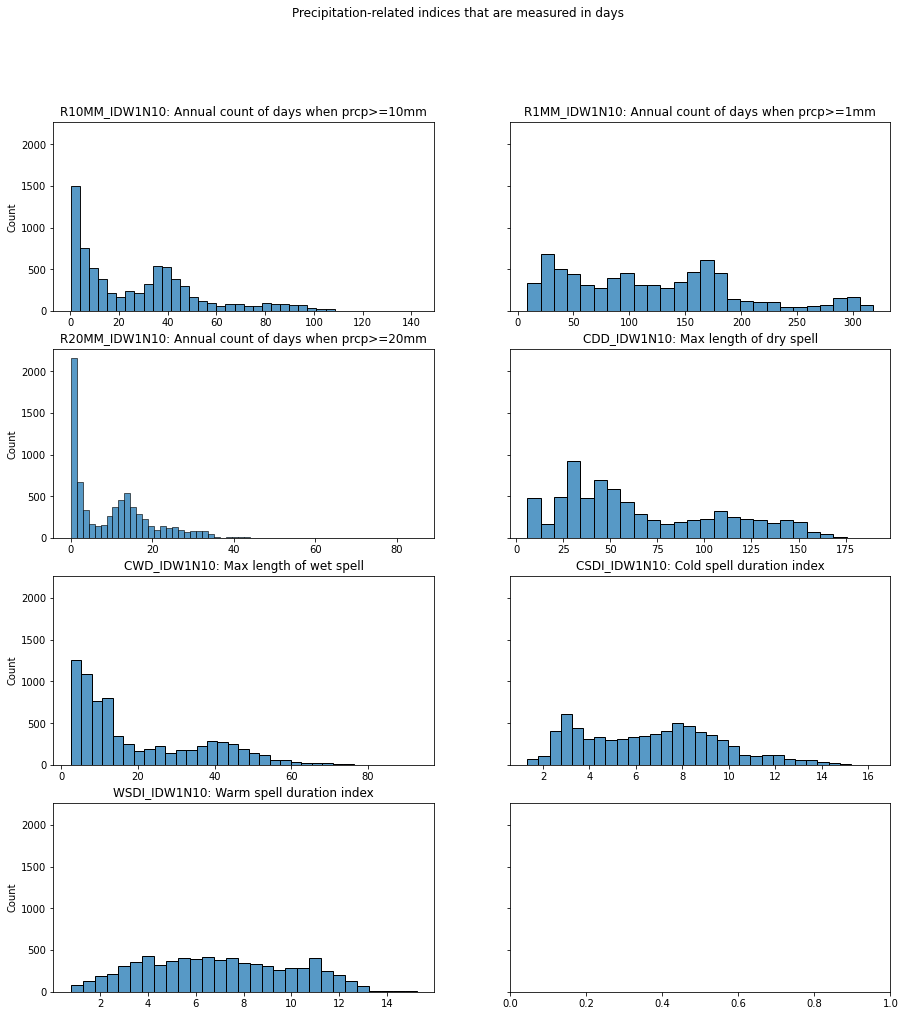

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(15, 16),sharey=True)
fig.suptitle('Precipitation-related indices that are measured in days')

for idx,ax in zip(precp_days_group, axes.flat):
    sns.histplot(ax=ax,data=traindata[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-2. Precipitation related variables, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII <a class="anchor" id="traintest_precp_mm_group"></a>

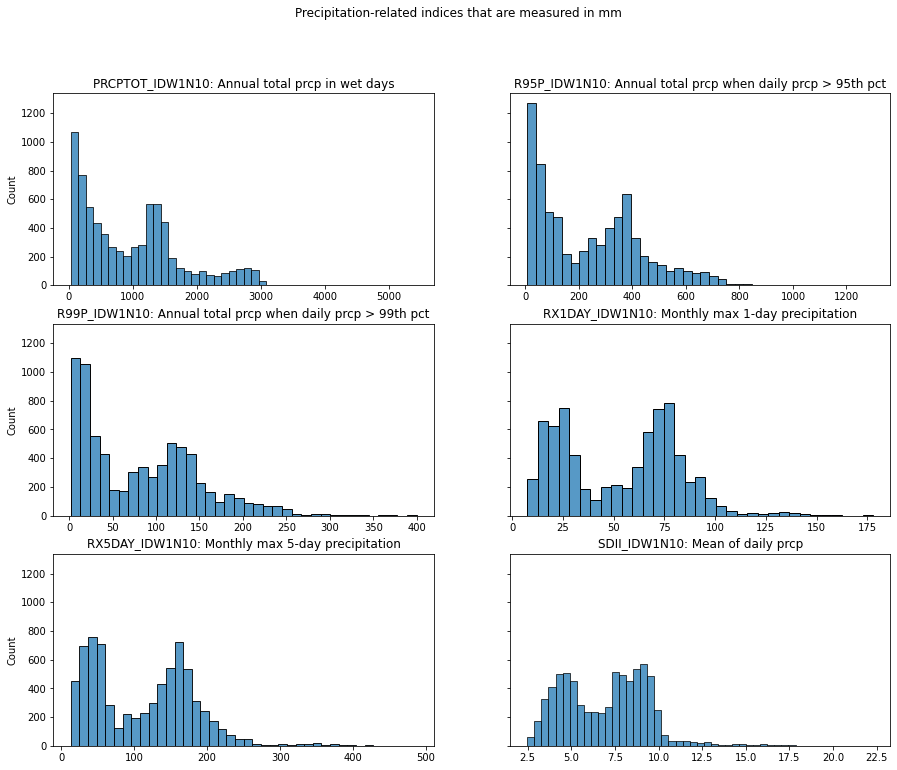

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=True)
fig.suptitle('Precipitation-related indices that are measured in mm')

for idx,ax in zip(precp_mm_group, axes.flat):
    sns.histplot(ax=ax,data=traindata[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-3. Temperature related variables, measured in days: FD, ID, SU, TR, GSL<a class="anchor" id="traintest_temp_days_group"></a>

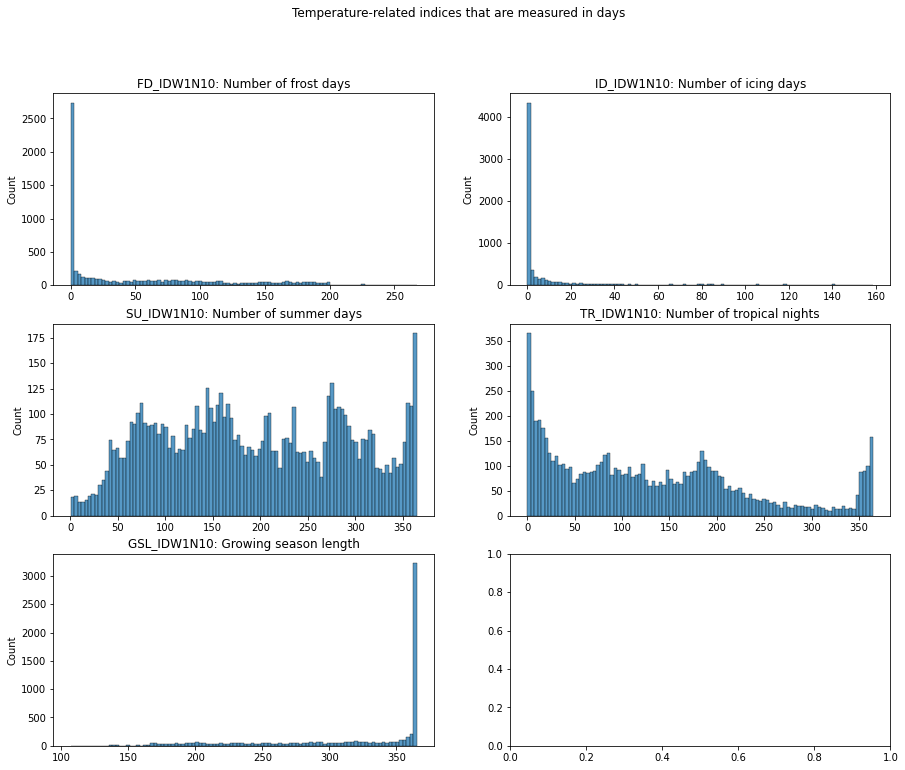

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in days')

for idx,ax in zip(temp_days_group, axes.flat):
    sns.histplot(ax=ax,data=traindata[idx],bins=100)
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-4. Temperature related variables, measured in percentages: TN10P, TN90P, TX10P, TX90P<a class="anchor" id="traintest_temp_pct_group"></a>

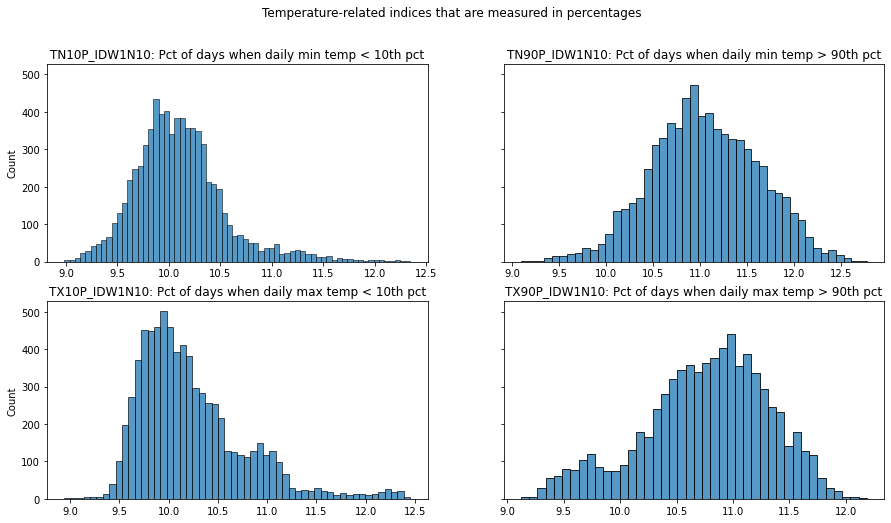

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8),sharey=True)
fig.suptitle('Temperature-related indices that are measured in percentages')

for idx,ax in zip(temp_pct_group, axes.flat):
    sns.histplot(ax=ax,data=traindata[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

#### 1-5. Temperature related variables, measured in degrees: TNN, TNX, TXN, TXX, DTR<a class="anchor" id="traintest_temp_deg_group"></a>

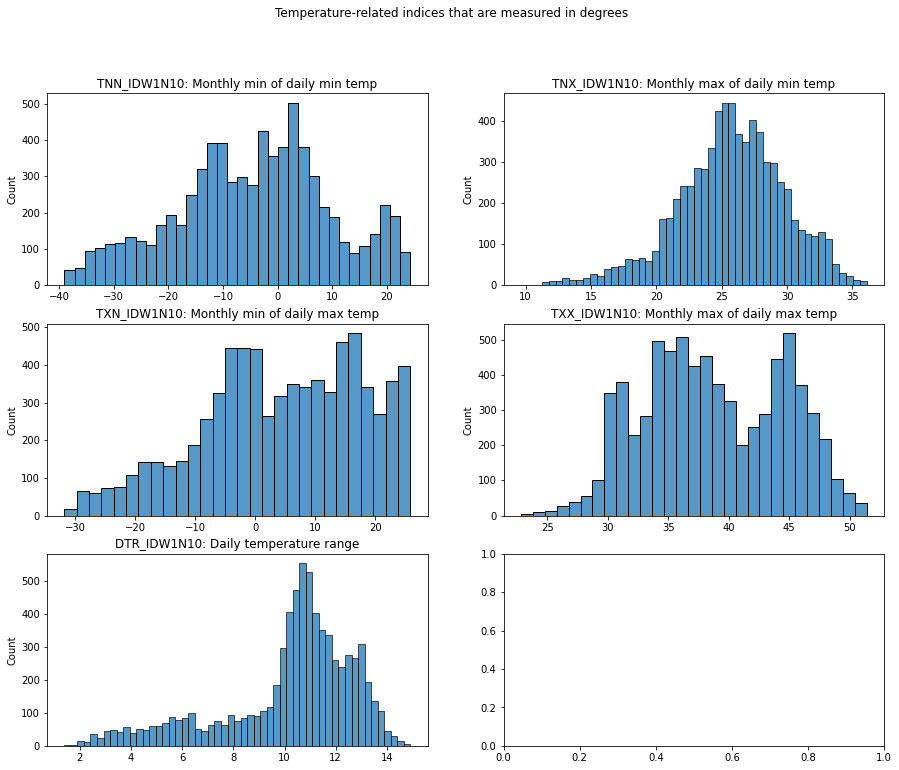

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in degrees')

for idx,ax in zip(temp_deg_group, axes.flat):
    sns.histplot(ax=ax,data=traindata[idx])
    ax.set(xlabel=None)
    ax.set_title(idx+": "+var_dict[idx])

### 2. Visualizing the correlation matrix<a class="anchor" id="model-corr"></a>

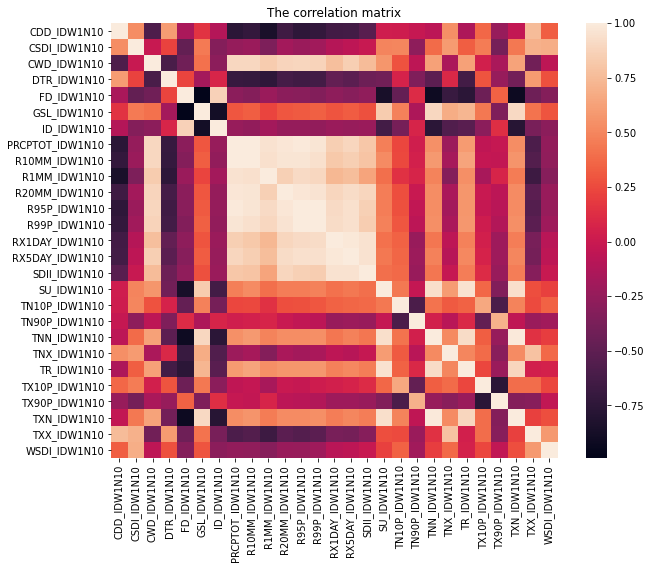

In [25]:
plt.figure(figsize=(10,8))
plt.title("The correlation matrix")

corr = traindata.drop("HID", axis=1,inplace=False).corr()
sns.heatmap(corr)
plt.show()